In [1]:
import pandas as pd
import numpy as np
import altair as alt
import altair_saver
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./data/9_2_2022-Roster-Freeze-Salary-List.csv')

In [3]:
df.head()

,Club,Nickname,Last Name,First Name,Position,2022 Base Salary,2022 Guar. Comp.
0,Atlanta United,NaN,Almada,Thiago,M-F,"$1,650,000.00","$2,332,000.00"
1,Atlanta United,NaN,Alonso,Osvaldo,M,"$84,000.00","$84,000.00"
2,Atlanta United,Mikey,Ambrose,Mikey,D,"$85,444.00","$85,444.00"
3,Atlanta United,NaN,Araujo,Luiz,F-M,"$3,600,000.00","$4,480,333.00"
4,Atlanta United,NaN,Barco,Ezequiel,M,"$2,200,000.00","$2,200,000.00"


In [4]:
df.columns = \
    [
        'club', 'nickname', 'last_name', 'first_name', 
        'position', 'base_salary_2022', 'guar_comp_2022'
        ]

new_order = [
    'club', 'first_name', 'last_name', 'nickname', 
    'position', 'base_salary_2022', 'guar_comp_2022'
    ]

df = df[new_order]

In [5]:
def clean_salary(string):
    pattern = "[,$]|(\.00)"
    output = re.sub(pattern, "", string)
    output = float(output)
    return output

In [6]:
df['base_salary_2022'] = df['base_salary_2022'].apply(clean_salary)
df['guar_comp_2022'] = df['guar_comp_2022'].apply(clean_salary)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 894 entries, 0 to 893
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   club              894 non-null    object 
 1   first_name        894 non-null    object 
 2   last_name         887 non-null    object 
 3   nickname          55 non-null     object 
 4   position          891 non-null    object 
 5   base_salary_2022  894 non-null    float64
 6   guar_comp_2022    894 non-null    float64
dtypes: float64(2), object(5)
memory usage: 49.0+ KB


In [8]:
df

,club,first_name,last_name,nickname,position,base_salary_2022,guar_comp_2022
0,Atlanta United,Thiago,Almada,NaN,M-F,1650000.0,2332000.0
1,Atlanta United,Osvaldo,Alonso,NaN,M,84000.0,84000.0
2,Atlanta United,Mikey,Ambrose,Mikey,D,85444.0,85444.0
3,Atlanta United,Luiz,Araujo,NaN,F-M,3600000.0,4480333.0
4,Atlanta United,Ezequiel,Barco,NaN,M,2200000.0,2200000.0
...,...,...,...,...,...,...,...
889,Vancouver Whitecaps,Caio Alexandre,Sousa e Silva,NaN,M,500000.0,562500.0
890,Vancouver Whitecaps,Russell,Teibert,NaN,M,400000.0,449375.0
891,Vancouver Whitecaps,Ranko,Veselinovic,NaN,D,405000.0,490500.0
892,Vancouver Whitecaps,Pedro,Vite,NaN,M,556000.0,609997.0


In [9]:
df.isna().sum()

club                  0
first_name            0
last_name             7
nickname            839
position              3
base_salary_2022      0
guar_comp_2022        0
dtype: int64

In [10]:
df[df['last_name'].isna()]

,club,first_name,last_name,nickname,position,base_salary_2022,guar_comp_2022
194,Colorado Rapids,Max,NaN,Max Alves da Silva,M,212000.0,293360.0
322,FC Dallas,Nanu,NaN,Eulanio Angelo Chipela Gomes,D,600000.0,668750.0
354,Houston Dynamo,Zeca,NaN,Jose Carlos Cracco Neto,D,218182.0,259015.0
612,New York Red Bulls,Luquinhas,NaN,Lucas De Lima Linhares,F,1050000.0,1173125.0
765,San Jose Earthquakes,Judson,NaN,NaN,M,420000.0,425000.0
766,San Jose Earthquakes,Rodrigues,NaN,Rodrigues,D,550000.0,608000.0
859,Toronto FC,Auro Jr.,NaN,Auro Jr.,D,400000.0,428750.0


In [11]:
df.loc[194, 'last_name'] = "Alves da Silva"
df.loc[322, 'first_name'] = "Eulanio"
df.loc[322, 'last_name'] = "Angelo Chipela Gomes"
df.loc[322, 'nickname'] = "Nanu"
df.loc[354, 'first_name'] = "Jose"
df.loc[354, 'last_name'] = "Carlos Cracco Neto"
df.loc[354, 'nickname'] = "Zeca"
df.loc[612, 'first_name'] = "Lucas"
df.loc[612, 'last_name'] = "De Lima Linhares"
df.loc[612, 'nickname'] = "Luquinhas"
df.loc[765, 'last_name'] = "Silva Tavares"
df.loc[766, 'first_name'] = "Antonio"
df.loc[766, 'last_name'] = "Josenildo Rodrigues de Oliveira"
df.loc[766, 'nickname'] = "Rodrigues"
df.loc[859, 'first_name'] = "Auro"
df.loc[859, 'last_name'] = "Alvaro da Cruz Junior"
df.loc[859, 'nickname'] = "Auro Jr."

In [12]:
df[df['position'].isna()]

,club,first_name,last_name,nickname,position,base_salary_2022,guar_comp_2022
92,CF Montreal,Sean,Rea,NaN,NaN,66724.0,74809.0
93,CF Montreal,Nathan-Dylan,Saliba,NaN,NaN,66724.0,77200.0
664,Philadelphia Union,Jeremy,Rafanello,NaN,NaN,65500.0,74774.0


In [13]:
df.loc[92, 'position'] = "M-F"
df.loc[93, 'position'] = "M-F"
df.loc[664, 'position'] = "M-F"

In [14]:
df['nickname'].fillna('MISSING', inplace=True)

In [15]:
df[df['club']=='DC United'].sort_values(by='guar_comp_2022', ascending=False)

,club,first_name,last_name,nickname,position,base_salary_2022,guar_comp_2022
227,DC United,Christian,Benteke,MISSING,F,4000000.0,4182778.0
234,DC United,Taxiarchis,Fountas,MISSING,F,1600000.0,1641000.0
242,DC United,Ola,Kamara,MISSING,F,1500000.0,1520000.0
245,DC United,Ravel,Morrison,MISSING,M,850000.0,917844.0
249,DC United,Victor,Palsson,MISSING,M,850000.0,863125.0
229,DC United,Steven,Birnbaum,MISSING,D,750000.0,762500.0
239,DC United,Bill,Hamid,MISSING,GK,700000.0,700000.0
252,DC United,Nigel,Robertha,MISSING,F,550000.0,622406.0
253,DC United,Martin,Rodriguez,MISSING,F-M,456000.0,597200.0
258,DC United,Brad,Smith,MISSING,D,550000.0,591250.0


In [16]:
avg_comp_by_club = df[['club', 'guar_comp_2022']].groupby('club').agg(np.mean).sort_values(by='guar_comp_2022', ascending=False).reset_index()
avg_comp_by_club

,club,guar_comp_2022
0,Toronto FC,1.111542e+06
1,LA Galaxy,8.532286e+05
2,Inter Miami,7.331599e+05
3,St. Louis SC,7.167749e+05
4,Chicago Fire,6.674401e+05
5,LAFC,6.129641e+05
6,Seattle Sounders FC,6.065624e+05
7,Atlanta United,6.062529e+05
8,Columbus Crew,5.964269e+05
9,New England Revolution,5.807673e+05


In [17]:
chart_guar_comp = alt.Chart(avg_comp_by_club).mark_bar().encode(
    # x='club',
    x=alt.X(
        'club:N', title='Team', sort='-y'
        ),
    y=alt.Y(
        'guar_comp_2022', 
        title='Average guaranteed compensation'
        ),
    color=alt.Color(
        'guar_comp_2022', 
        legend=alt.Legend(
            title="Avg. Guaranteed Compensation",
            format='$.2s'
            )
        ),
    tooltip=[
        alt.Tooltip(field='club', title='MLS Team'),
        alt.Tooltip(field='guar_comp_2022', title='Avg. guaranteed compensation', format='$,.2f')
    ]
).properties(
    title='MLS Average Guaranteed Player Compensation by Team'
).configure(
    title={
        'font':'Calibri',
        'fontSize':20,
        'anchor':'middle',
    },
    axisX={
        'labelFont':'Calibri',
        'labelFontSize':12.5,
        'labelAngle':-60,
        'titleFont':'Calibri',
        'titleFontSize':15
    },
    axisY={
        'labelFont':'Calibri',
        'labelFontSize':12.5,
        'titleFont':'Calibri',
        'titleFontSize':15,
        'format':'$.2s',
    }
)

chart_guar_comp

alt.Chart(...)

In [18]:
# chart_guar_comp.save(
#     'guar_comp_html.html',
#     embed_options={'renderer':'svg', 'actions':False}
#     )

In [80]:
pal = sns.color_palette("blend:#150cc7,#8bebfc", n_colors=len(avg_comp_by_club))
pal

[(0.08235294117647059, 0.047058823529411764, 0.7803921568627451),
 (0.09687043444828912, 0.07449442522106882, 0.7869127258746635),
 (0.11320261437908496, 0.105359477124183, 0.7942483660130719),
 (0.1295347943098808, 0.1362245290272972, 0.8015840061514802),
 (0.14586697424067666, 0.16708958093041137, 0.8089196462898885),
 (0.16219915417147251, 0.19795463283352557, 0.8162552864282968),
 (0.17671664744329102, 0.22539023452518261, 0.8227758554402154),
 (0.19304882737408688, 0.25625528642829676, 0.8301114955786236),
 (0.20938100730488274, 0.28712033833141104, 0.8374471357170319),
 (0.22571318723567857, 0.3179853902345252, 0.8447827758554403),
 (0.2420453671664744, 0.3488504421376394, 0.8521184159938485),
 (0.25837754709727023, 0.37971549404075355, 0.8594540561322568),
 (0.2728950403690888, 0.4071510957324106, 0.8659746251441753),
 (0.2892272202998846, 0.43801614763552477, 0.8733102652825836),
 (0.3055594002306805, 0.468881199538639, 0.880645905420992),
 (0.3218915801614763, 0.4997462514417531, 0.8879815455594002),
 (0.3382237600922722, 0.5306113033448674, 0.8953171856978086),
 (0.354555940023068, 0.5614763552479816, 0.9026528258362169),
 (0.36907343329488657, 0.5889119569396386, 0.9091733948481353),
 (0.3854056132256824, 0.6197770088427528, 0.9165090349865437),
 (0.40173779315647823, 0.650642060745867, 0.9238446751249519),
 (0.41806997308727406, 0.6815071126489811, 0.9311803152633602),
 (0.4344021530180699, 0.7123721645520953, 0.9385159554017686),
 (0.4507343329488658, 0.7432372164552095, 0.9458515955401768),
 (0.4652518262206843, 0.7706728181468665, 0.9523721645520954),
 (0.48158400615148017, 0.8015378700499809, 0.9597078046905037),
 (0.497916186082276, 0.8324029219530951, 0.967043444828912),
 (0.5142483660130719, 0.8632679738562092, 0.9743790849673203),
 (0.5305805459438677, 0.8941330257593234, 0.9817147251057285),
 (0.5450980392156862, 0.9215686274509803, 0.9882352941176471)]

C:\Users\zshoo\AppData\Local\Temp\ipykernel_61336\3826133121.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['{:,.2}'.format(x/1000000) + "M" for x in compensation_sns.get_xticks()])


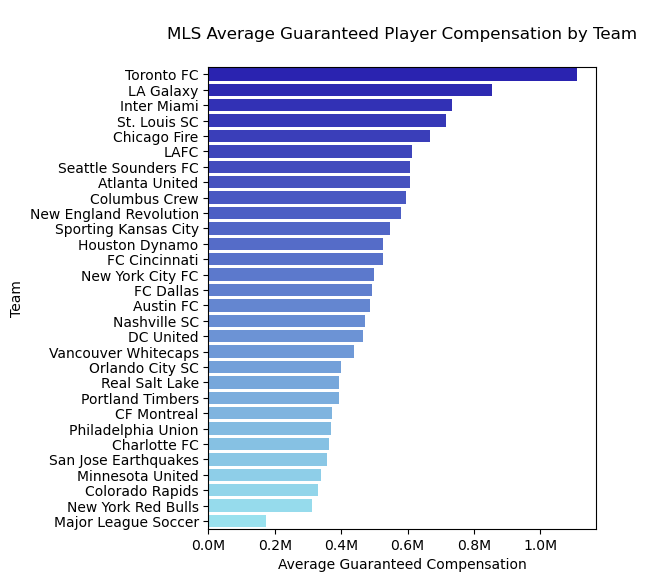

In [157]:
fig, ax = plt.subplots(figsize=(5,6))
# fig.suptitle()
compensation_sns = sns.barplot(
    data=avg_comp_by_club,
    x="guar_comp_2022",
    y="club",
    ax=ax,
    palette=pal,
    orient='h'
    )

ax.set_xticklabels(['{:,.2}'.format(x/1000000) + "M" for x in compensation_sns.get_xticks()])
ax.set_xlabel("Average Guaranteed Compensation")
ax.set_ylabel("Team")
ax.set_title("\nMLS Average Guaranteed Player Compensation by Team", pad=20);
# plt.savefig("guar_comp.png", dpi=200, bbox_inches = 'tight')